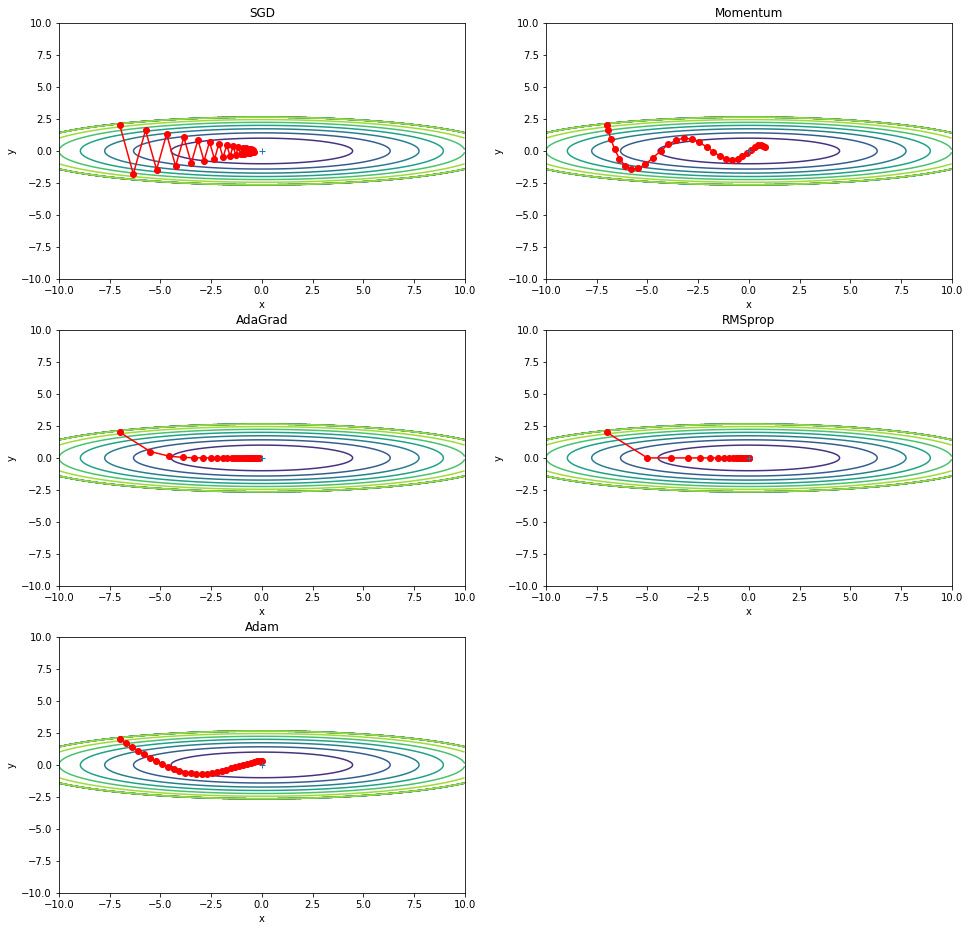

In [12]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *

plt.figure(figsize=(16, 16))

# def f(x, y):
#     return x**2  + y**2


# def df(x, y):
#     return 2.0*x , 2.0*y

def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

# init_pos = (-2.5, 0.0)
init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["RMSprop"] = RMSprop(lr=0.2)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(3, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)

#     plt.ylim(-5, 5)
#     plt.xlim(-5, 5)

    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

===========iteration:0===========
SGD:2.362666715499361
Momentum:2.414933372348271
AdaGrad:2.2861073003830743
Adam:2.1692916026564664
===========iteration:100===========
SGD:1.6834181083856765
Momentum:0.4862801658203087
AdaGrad:0.2535938885007994
Adam:0.29729426583958074
===========iteration:200===========
SGD:0.7894270048320184
Momentum:0.25039878723045694
AdaGrad:0.1378409381343263
Adam:0.17664884042973727
===========iteration:300===========
SGD:0.6411059429831183
Momentum:0.22798186750898392
AdaGrad:0.1094483237572752
Adam:0.19193207131058032
===========iteration:400===========
SGD:0.34269365463302226
Momentum:0.10202979032827819
AdaGrad:0.029087592166455227
Adam:0.06053746349772598
===========iteration:500===========
SGD:0.5849432303087124
Momentum:0.23432937317799357
AdaGrad:0.10878415402131518
Adam:0.21139795421321153
===========iteration:600===========
SGD:0.493001883025017
Momentum:0.26099593226726986
AdaGrad:0.08955029285103226
Adam:0.15428397760952833
===========iteration:70

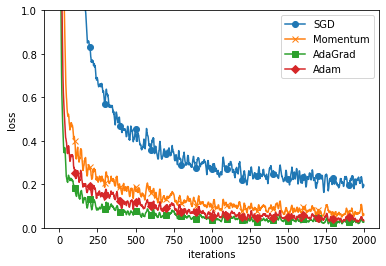

In [13]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

### numpy random 함수

In [46]:
import numpy as np
a = np.random.randn(100000)
print(a)
print(np.mean(a))
print(np.std(a))

[-0.89084401 -1.06229192 -0.77115998 ... -1.48914965 -0.5731379
  0.25879289]
-0.0017964549067504768
1.0025447533730039


In [90]:
import numpy as np
a = np.random.randn(10,10)*0.01
print(np.mean(a))
print(np.std(a))

0.0010921308095250485
0.009635882010074086


In [100]:
import numpy as np
a = np.random.uniform(low=-1.0, high=1.0, size=(10,10))
print(np.mean(a))
print(np.std(a))

0.008146521606599797
0.5497505979332996


(1000, 100)


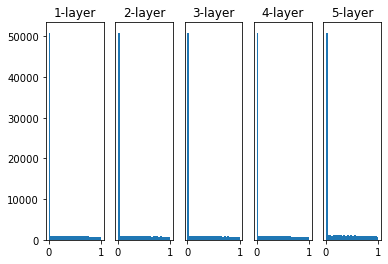

In [56]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
print(input_data.shape)
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
#     w = np.random.randn(node_num, node_num) * 1
#     w = np.random.randn(node_num, node_num) * 0.01
#     w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

# test
#     w = np.random.uniform(low=-2.0, high=2.0, size=(100,100))  * np.sqrt(2.0 / node_num)  

    a = np.dot(x, w)  # (1000,100)(100,100)


    # 활성화 함수도 바꿔가며 실험해보자！
#     z = sigmoid(a)
    z = ReLU(a)
#     z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

===========iteration:0===========
std=0.01:2.3024527295970514
Xavier:2.304093062459937
He:2.3720362524058567
===========iteration:100===========
std=0.01:2.3027334381710665
Xavier:2.229248714037229
He:1.6370462145627709
===========iteration:200===========
std=0.01:2.3015185494017625
Xavier:2.044163542161632
He:0.8149021959308055
===========iteration:300===========
std=0.01:2.3024496875019675
Xavier:1.7729183984665398
He:0.5238813093061039
===========iteration:400===========
std=0.01:2.3028072220502165
Xavier:1.2925512991400674
He:0.4035479763138593
===========iteration:500===========
std=0.01:2.3010780688516483
Xavier:0.9348853491006652
He:0.3692419578585492
===========iteration:600===========
std=0.01:2.301669363496014
Xavier:0.7223799003047185
He:0.3792593790796207
===========iteration:700===========
std=0.01:2.2974891161586086
Xavier:0.6184852924123333
He:0.3650625662507432
===========iteration:800===========
std=0.01:2.3011606391197406
Xavier:0.4224061547203356
He:0.237832205035253

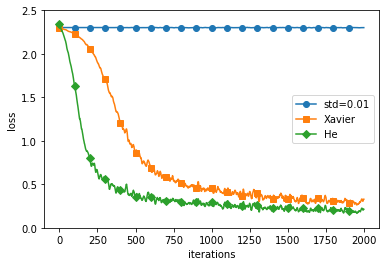

In [57]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

In [58]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend

plt.figure(figsize=(16, 16))
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100], 
                              output_size=10, use_batchnorm=True)

x_batch = x_train[:1]
t_batch = t_train[:1]

grad_backprop = network.gradient(x_batch, t_batch)
grad_numerical = network.numerical_gradient(x_batch, t_batch)


for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:0.0
b1:0.0
gamma1:0.0
beta1:0.0
W2:0.0
b2:0.0
gamma2:0.0
beta2:0.05354866319191576
W3:0.0
b3:1.7990402263745597e-07


<Figure size 1152x1152 with 0 Axes>

In [62]:
a = np.linspace(0, 4, 5)
a

array([0., 1., 2., 3., 4.])

In [60]:
a = np.logspace(0, 4, num=5, base=2)
a

array([ 1.,  2.,  4.,  8., 16.])

In [63]:
a = np.logspace(0, -4, num=5, base=2)
a

array([1.    , 0.5   , 0.25  , 0.125 , 0.0625])

In [64]:
a = np.logspace(0, 4, num=5, base=10)
a

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])

============== 1/16 ==============
epoch:0 | 0.117 - 0.074
epoch:1 | 0.097 - 0.087


..\common\functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
..\common\layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)


epoch:2 | 0.097 - 0.105
epoch:3 | 0.097 - 0.117
epoch:4 | 0.097 - 0.134
epoch:5 | 0.097 - 0.163
epoch:6 | 0.097 - 0.18
epoch:7 | 0.097 - 0.211
epoch:8 | 0.097 - 0.23
epoch:9 | 0.097 - 0.242
epoch:10 | 0.097 - 0.259
epoch:11 | 0.097 - 0.283
epoch:12 | 0.097 - 0.292
epoch:13 | 0.097 - 0.308
epoch:14 | 0.097 - 0.31
epoch:15 | 0.097 - 0.332
epoch:16 | 0.097 - 0.343
epoch:17 | 0.097 - 0.36


No handles with labels found to put in legend.


epoch:18 | 0.097 - 0.381
epoch:19 | 0.097 - 0.389
============== 2/16 ==============
epoch:0 | 0.097 - 0.119

..\common\layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)


..\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
..\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\jikim\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


epoch:1 | 0.097 - 0.107
epoch:2 | 0.097 - 0.104
epoch:3 | 0.097 - 0.119
epoch:4 | 0.097 - 0.147
epoch:5 | 0.097 - 0.175
epoch:6 | 0.097 - 0.2
epoch:7 | 0.097 - 0.218
epoch:8 | 0.097 - 0.246
epoch:9 | 0.097 - 0.275
epoch:10 | 0.097 - 0.294
epoch:11 | 0.097 - 0.317
epoch:12 | 0.097 - 0.339
epoch:13 | 0.097 - 0.365
epoch:14 | 0.097 - 0.386
epoch:15 | 0.097 - 0.396
epoch:16 | 0.097 - 0.419
epoch:17 | 0.097 - 0.439
epoch:18 | 0.097 - 0.454


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.467
============== 3/16 ==============
epoch:0 | 0.098 - 0.081
epoch:1 | 0.385 - 0.129
epoch:2 | 0.514 - 0.162
epoch:3 | 0.595 - 0.202
epoch:4 | 0.653 - 0.236
epoch:5 | 0.705 - 0.269
epoch:6 | 0.77 - 0.302
epoch:7 | 0.794 - 0.33
epoch:8 | 0.833 - 0.35
epoch:9 | 0.85 - 0.368
epoch:10 | 0.86 - 0.396
epoch:11 | 0.897 - 0.424
epoch:12 | 0.904 - 0.452
epoch:13 | 0.929 - 0.475
epoch:14 | 0.942 - 0.496
epoch:15 | 0.944 - 0.516
epoch:16 | 0.949 - 0.54
epoch:17 | 0.956 - 0.556
epoch:18 | 0.964 - 0.579


No handles with labels found to put in legend.


epoch:19 | 0.969 - 0.596
============== 4/16 ==============
epoch:0 | 0.151 - 0.123
epoch:1 | 0.258 - 0.142
epoch:2 | 0.397 - 0.185
epoch:3 | 0.509 - 0.257
epoch:4 | 0.611 - 0.333
epoch:5 | 0.647 - 0.402
epoch:6 | 0.698 - 0.454
epoch:7 | 0.708 - 0.507
epoch:8 | 0.739 - 0.552
epoch:9 | 0.752 - 0.594
epoch:10 | 0.773 - 0.624
epoch:11 | 0.791 - 0.66
epoch:12 | 0.807 - 0.677
epoch:13 | 0.821 - 0.689
epoch:14 | 0.823 - 0.709
epoch:15 | 0.832 - 0.729
epoch:16 | 0.846 - 0.75
epoch:17 | 0.849 - 0.764
epoch:18 | 0.845 - 0.767
epoch:19 | 0.864 - 0.78


No handles with labels found to put in legend.


============== 5/16 ==============
epoch:0 | 0.107 - 0.085
epoch:1 | 0.109 - 0.178
epoch:2 | 0.109 - 0.324
epoch:3 | 0.109 - 0.426
epoch:4 | 0.11 - 0.495
epoch:5 | 0.11 - 0.546
epoch:6 | 0.111 - 0.599
epoch:7 | 0.115 - 0.652
epoch:8 | 0.118 - 0.702
epoch:9 | 0.12 - 0.729
epoch:10 | 0.128 - 0.761
epoch:11 | 0.138 - 0.78
epoch:12 | 0.147 - 0.802
epoch:13 | 0.156 - 0.812
epoch:14 | 0.179 - 0.827
epoch:15 | 0.179 - 0.84
epoch:16 | 0.187 - 0.846
epoch:17 | 0.205 - 0.857
epoch:18 | 0.22 - 0.868


No handles with labels found to put in legend.


epoch:19 | 0.233 - 0.874
============== 6/16 ==============
epoch:0 | 0.09 - 0.129
epoch:1 | 0.077 - 0.193
epoch:2 | 0.099 - 0.5
epoch:3 | 0.133 - 0.643
epoch:4 | 0.118 - 0.728
epoch:5 | 0.121 - 0.761
epoch:6 | 0.152 - 0.787
epoch:7 | 0.116 - 0.813
epoch:8 | 0.116 - 0.83
epoch:9 | 0.117 - 0.85
epoch:10 | 0.117 - 0.865
epoch:11 | 0.116 - 0.885
epoch:12 | 0.116 - 0.893
epoch:13 | 0.116 - 0.904
epoch:14 | 0.116 - 0.916
epoch:15 | 0.116 - 0.928
epoch:16 | 0.117 - 0.93
epoch:17 | 0.12 - 0.937


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.948
epoch:19 | 0.117 - 0.954
============== 7/16 ==============
epoch:0 | 0.116 - 0.129
epoch:1 | 0.116 - 0.286
epoch:2 | 0.117 - 0.582
epoch:3 | 0.117 - 0.693
epoch:4 | 0.117 - 0.763
epoch:5 | 0.117 - 0.812
epoch:6 | 0.117 - 0.859
epoch:7 | 0.117 - 0.88
epoch:8 | 0.117 - 0.898
epoch:9 | 0.117 - 0.914
epoch:10 | 0.117 - 0.931
epoch:11 | 0.117 - 0.947
epoch:12 | 0.117 - 0.955
epoch:13 | 0.117 - 0.964
epoch:14 | 0.117 - 0.97
epoch:15 | 0.117 - 0.977
epoch:16 | 0.117 - 0.981
epoch:17 | 0.117 - 0.985
epoch:18 | 0.117 - 0.985


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.987
============== 8/16 ==============
epoch:0 | 0.105 - 0.128
epoch:1 | 0.097 - 0.446
epoch:2 | 0.116 - 0.725
epoch:3 | 0.117 - 0.807
epoch:4 | 0.117 - 0.829
epoch:5 | 0.117 - 0.888
epoch:6 | 0.117 - 0.914
epoch:7 | 0.117 - 0.947
epoch:8 | 0.117 - 0.953
epoch:9 | 0.117 - 0.967
epoch:10 | 0.117 - 0.982
epoch:11 | 0.117 - 0.99
epoch:12 | 0.117 - 0.99
epoch:13 | 0.117 - 0.991
epoch:14 | 0.117 - 0.997
epoch:15 | 0.117 - 0.998
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 0.999
epoch:18 | 0.117 - 0.999

No handles with labels found to put in legend.



epoch:19 | 0.117 - 1.0
============== 9/16 ==============
epoch:0 | 0.099 - 0.105
epoch:1 | 0.117 - 0.497
epoch:2 | 0.117 - 0.682
epoch:3 | 0.116 - 0.737
epoch:4 | 0.116 - 0.769
epoch:5 | 0.117 - 0.812
epoch:6 | 0.117 - 0.847
epoch:7 | 0.117 - 0.891
epoch:8 | 0.117 - 0.959
epoch:9 | 0.117 - 0.958
epoch:10 | 0.117 - 0.989
epoch:11 | 0.117 - 0.994
epoch:12 | 0.117 - 0.999
epoch:13 | 0.117 - 0.997
epoch:14 | 0.117 - 1.0
epoch:15 | 0.117 - 1.0
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0
epoch:19 | 0.117 - 1.0

No handles with labels found to put in legend.



============== 10/16 ==============
epoch:0 | 0.116 - 0.131
epoch:1 | 0.1 - 0.57
epoch:2 | 0.116 - 0.789
epoch:3 | 0.116 - 0.906
epoch:4 | 0.116 - 0.904
epoch:5 | 0.116 - 0.933
epoch:6 | 0.116 - 0.945
epoch:7 | 0.116 - 0.975
epoch:8 | 0.116 - 0.983
epoch:9 | 0.116 - 0.992
epoch:10 | 0.116 - 0.972
epoch:11 | 0.116 - 0.993
epoch:12 | 0.116 - 0.996
epoch:13 | 0.116 - 0.997
epoch:14 | 0.116 - 0.992
epoch:15 | 0.116 - 0.991
epoch:16 | 0.116 - 0.999
epoch:17 | 0.116 - 0.961
epoch:18 | 0.116 - 0.994


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.997
============== 11/16 ==============
epoch:0 | 0.117 - 0.18
epoch:1 | 0.117 - 0.626
epoch:2 | 0.117 - 0.669
epoch:3 | 0.117 - 0.873
epoch:4 | 0.117 - 0.845
epoch:5 | 0.117 - 0.885
epoch:6 | 0.117 - 0.973
epoch:7 | 0.117 - 0.953
epoch:8 | 0.117 - 0.956
epoch:9 | 0.117 - 0.975
epoch:10 | 0.117 - 0.981
epoch:11 | 0.117 - 0.982
epoch:12 | 0.117 - 0.988
epoch:13 | 0.117 - 0.989
epoch:14 | 0.117 - 0.991
epoch:15 | 0.117 - 0.971
epoch:16 | 0.117 - 0.994
epoch:17 | 0.117 - 0.994
epoch:18 | 0.117 - 0.994


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.994
============== 12/16 ==============
epoch:0 | 0.116 - 0.147
epoch:1 | 0.116 - 0.503
epoch:2 | 0.116 - 0.645
epoch:3 | 0.116 - 0.665
epoch:4 | 0.116 - 0.712
epoch:5 | 0.116 - 0.721
epoch:6 | 0.116 - 0.761
epoch:7 | 0.116 - 0.695
epoch:8 | 0.116 - 0.781
epoch:9 | 0.116 - 0.848
epoch:10 | 0.116 - 0.797
epoch:11 | 0.116 - 0.791
epoch:12 | 0.116 - 0.793
epoch:13 | 0.116 - 0.787
epoch:14 | 0.116 - 0.794
epoch:15 | 0.116 - 0.791
epoch:16 | 0.116 - 0.795
epoch:17 | 0.116 - 0.795
epoch:18 | 0.116 - 0.831


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.868
============== 13/16 ==============
epoch:0 | 0.1 - 0.124
epoch:1 | 0.1 - 0.337
epoch:2 | 0.117 - 0.578
epoch:3 | 0.117 - 0.586
epoch:4 | 0.117 - 0.581
epoch:5 | 0.117 - 0.589
epoch:6 | 0.117 - 0.604
epoch:7 | 0.117 - 0.616
epoch:8 | 0.117 - 0.621
epoch:9 | 0.117 - 0.679
epoch:10 | 0.117 - 0.618
epoch:11 | 0.117 - 0.685
epoch:12 | 0.117 - 0.715
epoch:13 | 0.117 - 0.746
epoch:14 | 0.117 - 0.747
epoch:15 | 0.117 - 0.792
epoch:16 | 0.117 - 0.851
epoch:17 | 0.117 - 0.699


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.88
epoch:19 | 0.117 - 0.885
============== 14/16 ==============
epoch:0 | 0.116 - 0.095
epoch:1 | 0.117 - 0.42
epoch:2 | 0.117 - 0.486
epoch:3 | 0.117 - 0.552
epoch:4 | 0.117 - 0.536
epoch:5 | 0.117 - 0.562
epoch:6 | 0.117 - 0.571
epoch:7 | 0.117 - 0.558
epoch:8 | 0.117 - 0.56
epoch:9 | 0.116 - 0.611
epoch:10 | 0.116 - 0.601
epoch:11 | 0.116 - 0.577
epoch:12 | 0.116 - 0.613
epoch:13 | 0.117 - 0.603
epoch:14 | 0.117 - 0.608
epoch:15 | 0.117 - 0.613
epoch:16 | 0.117 - 0.609
epoch:17 | 0.117 - 0.614
epoch:18 | 0.117 - 0.615
epoch:19 | 0.117 - 0.618


No handles with labels found to put in legend.


============== 15/16 ==============
epoch:0 | 0.105 - 0.118
epoch:1 | 0.117 - 0.314
epoch:2 | 0.117 - 0.37
epoch:3 | 0.117 - 0.401
epoch:4 | 0.117 - 0.412
epoch:5 | 0.117 - 0.421
epoch:6 | 0.117 - 0.42
epoch:7 | 0.117 - 0.412
epoch:8 | 0.117 - 0.419
epoch:9 | 0.117 - 0.42
epoch:10 | 0.117 - 0.427
epoch:11 | 0.117 - 0.401
epoch:12 | 0.117 - 0.428
epoch:13 | 0.117 - 0.423
epoch:14 | 0.117 - 0.425
epoch:15 | 0.117 - 0.429
epoch:16 | 0.117 - 0.434
epoch:17 | 0.117 - 0.43
epoch:18 | 0.117 - 0.433
epoch:19 | 0.117 - 0.432

No handles with labels found to put in legend.



============== 16/16 ==============
epoch:0 | 0.093 - 0.095
epoch:1 | 0.117 - 0.203
epoch:2 | 0.117 - 0.304
epoch:3 | 0.117 - 0.316
epoch:4 | 0.117 - 0.325
epoch:5 | 0.117 - 0.226
epoch:6 | 0.117 - 0.324
epoch:7 | 0.117 - 0.415
epoch:8 | 0.117 - 0.42
epoch:9 | 0.117 - 0.428
epoch:10 | 0.117 - 0.419
epoch:11 | 0.117 - 0.418
epoch:12 | 0.117 - 0.43
epoch:13 | 0.117 - 0.43
epoch:14 | 0.117 - 0.432
epoch:15 | 0.117 - 0.433
epoch:16 | 0.117 - 0.433
epoch:17 | 0.117 - 0.433
epoch:18 | 0.116 - 0.433
epoch:19 | 0.116 - 0.433


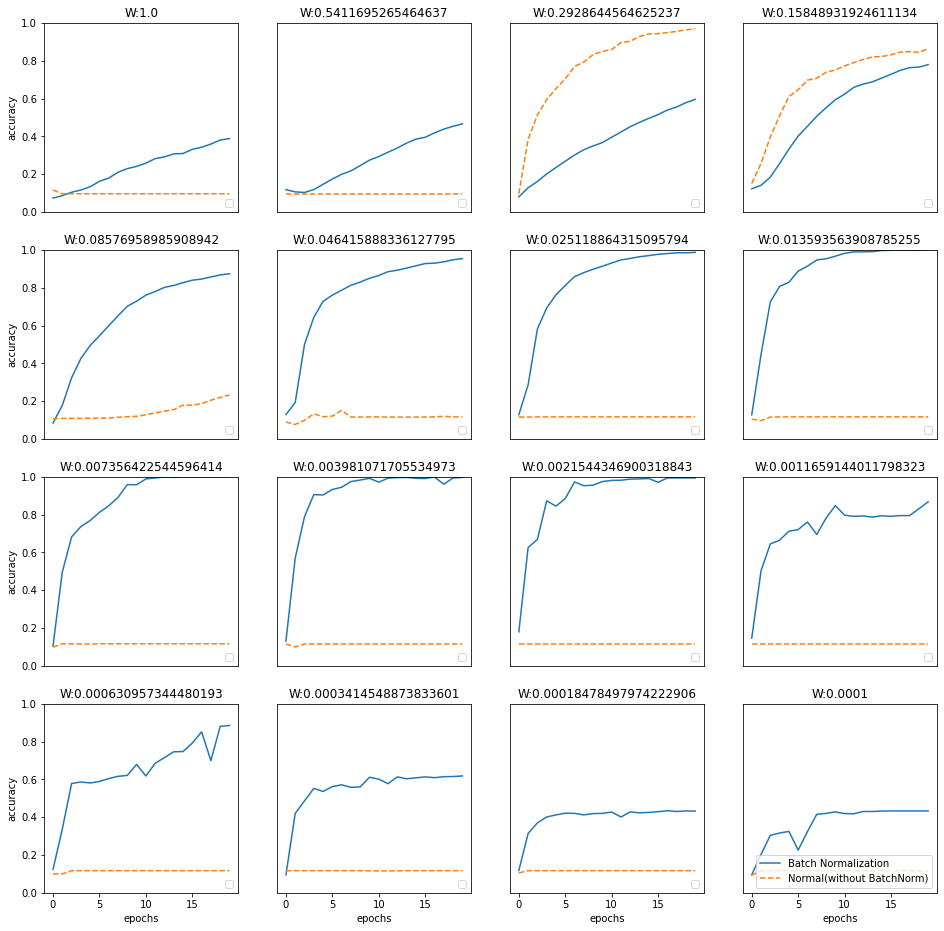

In [59]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

plt.figure(figsize=(16, 16))

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

epoch:0, train acc:0.13666666666666666, test acc:0.1251
epoch:1, train acc:0.16666666666666666, test acc:0.1294
epoch:2, train acc:0.17666666666666667, test acc:0.1413
epoch:3, train acc:0.17, test acc:0.1485
epoch:4, train acc:0.19, test acc:0.1558
epoch:5, train acc:0.22666666666666666, test acc:0.1661
epoch:6, train acc:0.22333333333333333, test acc:0.1699
epoch:7, train acc:0.25, test acc:0.1771
epoch:8, train acc:0.28, test acc:0.1822
epoch:9, train acc:0.31, test acc:0.19
epoch:10, train acc:0.31, test acc:0.1969
epoch:11, train acc:0.33666666666666667, test acc:0.2052
epoch:12, train acc:0.36, test acc:0.2147
epoch:13, train acc:0.37333333333333335, test acc:0.2239
epoch:14, train acc:0.38, test acc:0.2333
epoch:15, train acc:0.38666666666666666, test acc:0.2326
epoch:16, train acc:0.39666666666666667, test acc:0.2372
epoch:17, train acc:0.41333333333333333, test acc:0.2498
epoch:18, train acc:0.4166666666666667, test acc:0.2537
epoch:19, train acc:0.4266666666666667, test acc:0

epoch:159, train acc:0.9, test acc:0.6954
epoch:160, train acc:0.8933333333333333, test acc:0.6889
epoch:161, train acc:0.8966666666666666, test acc:0.6846
epoch:162, train acc:0.89, test acc:0.693
epoch:163, train acc:0.8966666666666666, test acc:0.6946
epoch:164, train acc:0.9033333333333333, test acc:0.688
epoch:165, train acc:0.9033333333333333, test acc:0.6895
epoch:166, train acc:0.8866666666666667, test acc:0.6961
epoch:167, train acc:0.8733333333333333, test acc:0.6858
epoch:168, train acc:0.89, test acc:0.6878
epoch:169, train acc:0.8866666666666667, test acc:0.6819
epoch:170, train acc:0.8733333333333333, test acc:0.6842
epoch:171, train acc:0.8933333333333333, test acc:0.694
epoch:172, train acc:0.89, test acc:0.6858
epoch:173, train acc:0.8833333333333333, test acc:0.6939
epoch:174, train acc:0.9, test acc:0.6959
epoch:175, train acc:0.8966666666666666, test acc:0.6957
epoch:176, train acc:0.9066666666666666, test acc:0.6862
epoch:177, train acc:0.9033333333333333, test acc

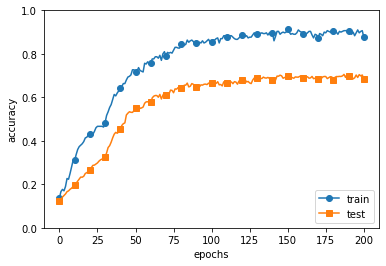

In [2]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
# weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 드롭아웃 테스트

In [78]:
import numpy as np
x = (6, 5)
print(x)
print(*x) # tuple unpacking
a = np.random.rand(*x)  # np.random.rand( 6, 5 )
print(a)

(6, 5)
6 5
[[0.40203406 0.4433951  0.55536153 0.33356297 0.49541288]
 [0.6415424  0.54252991 0.26348315 0.03727285 0.89569402]
 [0.27122944 0.15144919 0.48433262 0.19350677 0.75136174]
 [0.72586965 0.37425925 0.72712708 0.51676362 0.286223  ]
 [0.68408024 0.64796843 0.67776621 0.07391611 0.95163122]
 [0.06148382 0.7362372  0.80556519 0.25971264 0.37170476]]


In [115]:
import numpy as np
x = np.arange(30).reshape(6,5)
print(x)
# print(x.shape)
mask = np.random.rand(*x.shape)
print(mask)
mask = mask > 0.2
print(mask)
print(np.mean(mask))
print(x * mask)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]]
[[0.48363815 0.19162826 0.19876188 0.04675149 0.523168  ]
 [0.51853281 0.49396107 0.45278068 0.59927358 0.18001182]
 [0.01664313 0.62306089 0.88465161 0.39268158 0.82406023]
 [0.69777498 0.04381225 0.21406718 0.54334193 0.00411806]
 [0.51614751 0.43359854 0.74815935 0.64884707 0.55911877]
 [0.24597417 0.47252222 0.42847704 0.87262079 0.44268808]]
[[ True False False False  True]
 [ True  True  True  True False]
 [False  True  True  True  True]
 [ True False  True  True False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
0.7666666666666667
[[ 0  0  0  0  4]
 [ 5  6  7  8  0]
 [ 0 11 12 13 14]
 [15  0 17 18  0]
 [20 21 22 23 24]
 [25 26 27 28 29]]


train loss:2.320548983576088
=== epoch:1, train acc:0.12, test acc:0.1106 ===
train loss:2.3168791981381527
train loss:2.312466299565169
train loss:2.3118196624584892
=== epoch:2, train acc:0.12333333333333334, test acc:0.1117 ===
train loss:2.3050411104430077
train loss:2.297757724801831
train loss:2.3012247848824625
=== epoch:3, train acc:0.12333333333333334, test acc:0.1111 ===
train loss:2.3088915092970033
train loss:2.3031690860639515
train loss:2.293076330935143
=== epoch:4, train acc:0.12, test acc:0.1117 ===
train loss:2.316389614608344
train loss:2.301621611490172
train loss:2.303908177475726
=== epoch:5, train acc:0.11666666666666667, test acc:0.1111 ===
train loss:2.314313544515748
train loss:2.3025776453298845
train loss:2.3193511789023287
=== epoch:6, train acc:0.11666666666666667, test acc:0.1103 ===
train loss:2.298253921649473
train loss:2.306336840398553
train loss:2.297212750432641
=== epoch:7, train acc:0.11333333333333333, test acc:0.1109 ===
train loss:2.2866093960

=== epoch:56, train acc:0.19666666666666666, test acc:0.1787 ===
train loss:2.230748641190439
train loss:2.2485230938987804
train loss:2.2450069987909216
=== epoch:57, train acc:0.19666666666666666, test acc:0.1837 ===
train loss:2.2341247506575126
train loss:2.2565701814311496
train loss:2.2750138507788167
=== epoch:58, train acc:0.20333333333333334, test acc:0.1894 ===
train loss:2.2648979070856234
train loss:2.242202938636797
train loss:2.211141985875524
=== epoch:59, train acc:0.20333333333333334, test acc:0.1945 ===
train loss:2.2278891024209373
train loss:2.25882081640343
train loss:2.2502758807928394
=== epoch:60, train acc:0.23333333333333334, test acc:0.2021 ===
train loss:2.230643199677997
train loss:2.210940840696151
train loss:2.244004522627528
=== epoch:61, train acc:0.22333333333333333, test acc:0.2011 ===
train loss:2.2276645003152535
train loss:2.2084406354244224
train loss:2.23368020179398
=== epoch:62, train acc:0.22333333333333333, test acc:0.2037 ===
train loss:2.25

=== epoch:111, train acc:0.29, test acc:0.2353 ===
train loss:2.178986259850328
train loss:2.1394039299052867
train loss:2.0857801664622473
=== epoch:112, train acc:0.29, test acc:0.2364 ===
train loss:2.0634687422477556
train loss:2.106044168856292
train loss:2.1203273446306334
=== epoch:113, train acc:0.29, test acc:0.2379 ===
train loss:2.184626538076853
train loss:2.14282386475599
train loss:2.0735548496477647
=== epoch:114, train acc:0.29, test acc:0.2365 ===
train loss:2.0722803278654753
train loss:2.061857299721928
train loss:2.1588316425976117
=== epoch:115, train acc:0.29, test acc:0.2352 ===
train loss:2.1565333355705256
train loss:2.1062189993002334
train loss:2.125448171615506
=== epoch:116, train acc:0.2866666666666667, test acc:0.2361 ===
train loss:2.134523386930981
train loss:2.1015960765708157
train loss:2.0631907546093204
=== epoch:117, train acc:0.2866666666666667, test acc:0.2377 ===
train loss:2.1173108161972944
train loss:2.1316324684070382
train loss:2.0462954556

=== epoch:167, train acc:0.3333333333333333, test acc:0.2693 ===
train loss:2.027804543332164
train loss:1.8973722348116526
train loss:2.0246391365408574
=== epoch:168, train acc:0.3333333333333333, test acc:0.271 ===
train loss:2.0492122914310724
train loss:1.9638762112193258
train loss:1.9979711281975505
=== epoch:169, train acc:0.3333333333333333, test acc:0.2709 ===
train loss:2.086303779288645
train loss:2.0294571643900925
train loss:2.1787984845165465
=== epoch:170, train acc:0.33666666666666667, test acc:0.2742 ===
train loss:1.923006280837822
train loss:1.971573536860146
train loss:1.8318791887355887
=== epoch:171, train acc:0.3333333333333333, test acc:0.2726 ===
train loss:1.9858523409179072
train loss:1.9661711656037537
train loss:2.01401962100662
=== epoch:172, train acc:0.33666666666666667, test acc:0.272 ===
train loss:2.058477008011226
train loss:1.9896653864704341
train loss:1.9791438925393212
=== epoch:173, train acc:0.33666666666666667, test acc:0.2726 ===
train loss:

=== epoch:222, train acc:0.43666666666666665, test acc:0.3373 ===
train loss:1.9183426711904727
train loss:1.86723640197162
train loss:1.9014801268469477
=== epoch:223, train acc:0.43, test acc:0.3376 ===
train loss:1.9844809428182233
train loss:1.8479393961820418
train loss:1.9530451441397856
=== epoch:224, train acc:0.44, test acc:0.34 ===
train loss:1.8525845347717986
train loss:1.9639150889716737
train loss:1.8983414412476636
=== epoch:225, train acc:0.43333333333333335, test acc:0.3429 ===
train loss:1.8850528909146385
train loss:1.8790926324340567
train loss:1.7391360267785527
=== epoch:226, train acc:0.44, test acc:0.3425 ===
train loss:1.9415909798079816
train loss:1.896239889108268
train loss:1.8348638412857867
=== epoch:227, train acc:0.43666666666666665, test acc:0.3415 ===
train loss:1.9151754122815003
train loss:1.934330982519713
train loss:1.9162563867340427
=== epoch:228, train acc:0.44333333333333336, test acc:0.3423 ===
train loss:1.8283671307762148
train loss:1.851714

=== epoch:278, train acc:0.5366666666666666, test acc:0.4287 ===
train loss:1.767940689250015
train loss:1.862793779131789
train loss:1.828551143539356
=== epoch:279, train acc:0.5366666666666666, test acc:0.432 ===
train loss:1.7510453162365713
train loss:1.7319798014322134
train loss:1.7889242485438075
=== epoch:280, train acc:0.54, test acc:0.4371 ===
train loss:1.8035592227045039
train loss:1.7277324084193282
train loss:1.828172550708471
=== epoch:281, train acc:0.5433333333333333, test acc:0.441 ===
train loss:1.7390329868963967
train loss:1.6117558920521957
train loss:1.6884282481571313
=== epoch:282, train acc:0.54, test acc:0.4416 ===
train loss:1.7606689943775027
train loss:1.7491850246754037
train loss:1.7725720224526405
=== epoch:283, train acc:0.54, test acc:0.4436 ===
train loss:1.5712075495696498
train loss:1.590113883547441
train loss:1.5878534035524023
=== epoch:284, train acc:0.5333333333333333, test acc:0.443 ===
train loss:1.7080600691875867
train loss:1.770256479455

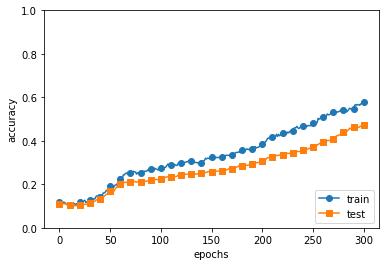

In [116]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [9]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

val acc:0.76 | lr:0.009148199165414608, weight decay:8.662597697273085e-06
val acc:0.13 | lr:0.0006936255480032815, weight decay:6.99591505427695e-05
val acc:0.07 | lr:7.50374092510703e-05, weight decay:2.136385282541291e-08
val acc:0.12 | lr:6.44737803725635e-06, weight decay:1.0755551923890743e-05
val acc:0.14 | lr:0.0005620055256653147, weight decay:2.057016177290107e-07
val acc:0.08 | lr:4.1881631002605094e-05, weight decay:5.694119296522235e-06
val acc:0.75 | lr:0.008057119100822125, weight decay:1.9857873177979526e-08
val acc:0.15 | lr:1.2216926461113917e-05, weight decay:2.3574866759128478e-08
val acc:0.11 | lr:1.0411642947497446e-06, weight decay:1.0226508484864606e-05
val acc:0.11 | lr:0.0003217100468845136, weight decay:1.3183528730543645e-07
val acc:0.23 | lr:0.00073669877727852, weight decay:6.399609300076623e-06
val acc:0.11 | lr:1.274647565262278e-05, weight decay:2.2693366390506056e-06
val acc:0.07 | lr:0.00020793235100092378, weight decay:1.6499231574945383e-05
val acc: